In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [12]:
news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake_news_dataset.xls')
news.head()

,content,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,0
1,Failed GOP Candidates Remembered In Hilarious...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,0
3,California AG pledges to defend birth control ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,0


In [13]:
X = news['content'].values
y = news['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 4. Traditional ML Model: TF-IDF + Logistic Regression

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4669
           1       0.98      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



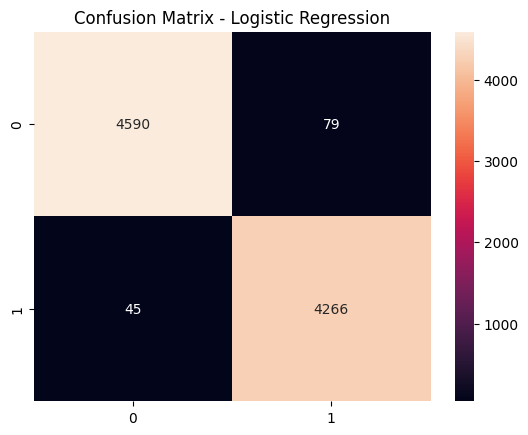

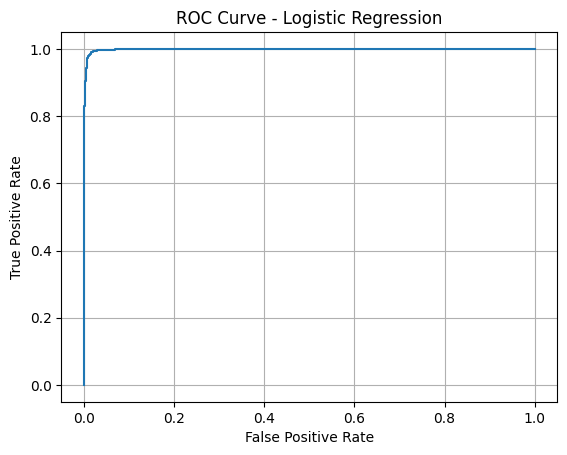

In [16]:
y_pred_lr = lr.predict(X_test_tfidf)

print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [17]:
!pip install gradio

In [18]:
import gradio as gr

def predict_news(news_text):
    transformed_text = tfidf.transform([news_text])
    prediction = lr.predict(transformed_text)[0]

    if prediction == 1:
        return "✅ Real News"
    else:
        return "🚨 Fake News"

# 8. Create Gradio Interface
interface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=10, placeholder="Paste news article here..."),
    outputs="text",
    title="📰 Fake News Detection (Traditional ML Model)",
    description="Paste a news article below and click 'Submit' to detect whether the news is Real ✅ or Fake 🚨.",
    theme="default"
)

# 9. Launch Interface
app, local_url, share_url = interface.launch(share=True)
print(f"\n🔗 Your Fake News Detection App is running here:\n{share_url}\n")

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5627fe43ae77474a0b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



🔗 Your Fake News Detection App is running here:
https://5627fe43ae77474a0b.gradio.live

